In [26]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [4]:
df = pd.read_csv('Iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# menmbuang kolom id
df = df.drop(columns='Id')

In [8]:
#membuat one hot encoding kolom spesies (label)
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [14]:
new_df = pd.concat([df,category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [15]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [17]:
# memisahkan atribut dan label
x = dataset[:,0:4]
y = dataset[:,4:7]

In [18]:
# normalisasi
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

In [19]:
# split training dan test
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3)

In [30]:
#arsitektur model NN

model = Sequential([
    Dense(64, activation = 'relu', input_shape=(4,)),
    Dense(64, activation = 'relu'),
    Dense(3, activation = 'softmax'),
])
model.compile(optimizer='Adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [21]:
hist = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 2ms/step - loss: 1.1004 - accuracy: 0.3631
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0688 - accuracy: 0.4731
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0417 - accuracy: 0.5421
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0036 - accuracy: 0.6230
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9843 - accuracy: 0.6483
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9657 - accuracy: 0.6507
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9297 - accuracy: 0.6424
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9090 - accuracy: 0.6205
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8697 - accuracy: 0.6403
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8302 - accuracy: 0.6653
Epoch 11/100
4/4 [===========

In [22]:
#evaluasi testing
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 0s/step - loss: 0.0688 - accuracy: 0.9778


[0.06875234097242355, 0.9777777791023254]

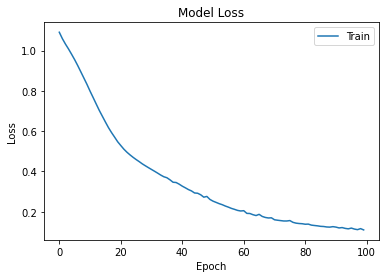

In [23]:
#plot hasil training (loss)
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

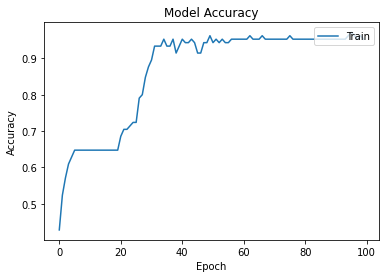

In [24]:
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [28]:
# membuat callback

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
            print('akurasi sudah mencapai 90%')
            self.model.stop_training = True
callbacks = myCallback()

In [31]:
model.fit(x_train, y_train, epochs=50, callbacks =[callbacks])

Epoch 1/50
4/4 [==============================] - 1s 2ms/step - loss: 1.0769 - accuracy: 0.3639
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0487 - accuracy: 0.4991
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0173 - accuracy: 0.6542
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9939 - accuracy: 0.6320
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9619 - accuracy: 0.6497
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9388 - accuracy: 0.6038
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9048 - accuracy: 0.6580
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.8751 - accuracy: 0.6372
Epoch 9/50
4/4 [==============================] - 0s 1ms/step - loss: 0.8418 - accuracy: 0.6580
Epoch 10/50
4/4 [==============================] - 0s 1ms/step - loss: 0.8103 - accuracy: 0.6434
Epoch 11/50
4/4 [======================